In [34]:
from FoKL import FoKLRoutines
import os
dir = os.path.abspath('')  # directory of notebook
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [29]:
filename = "tclab_sine_test.csv"
window = 9  # width of smoothing function's moving average; odd number, mean at center +/- floor(window/2))

In [30]:
data = pd.read_csv(os.path.join(dir, filename))

Q1 = data["Q1"].values
TS1 = data["T1"].values
tvec = data["Time"].values

In [31]:
def smooth(x, window):
    """Apply centered average of size window. x is 1D ndarray."""
    x_smooth = np.zeros_like(x)
    w2 = int(np.floor(window / 2))
    w2p1 = w2 + 1

    # bleed in:
    for i in range(w2):
        x_smooth[i] = np.mean(x[:(i + w2p1)])

    # center:
    for i in range(w2, x_smooth.size - w2):
        x_smooth[i] = np.mean(x[(i - w2):(i + w2p1)])

    # bleed out:
    for i in range(-w2, 0):
        x_smooth[i] = np.mean(x[(i - w2)::])

    return x_smooth

def gradient_h4(x, h):
    """x is 1D ndarray. h is step size. Order of error is h^4."""
    dx = np.zeros_like(x)

    # bleed in:
    h2 = 2 * h
    dx[0] = (x[1] - x[0]) / h
    dx[1] = (x[2] - x[0]) / h2

    # center difference:
    h12 = 12 * h
    for i in range(2, x.shape[0] - 2):
        dx[i] = (x[i - 2] - 8 * x[i - 1] + 8 * x[i + 1] - x[i + 2]) / h12
    
    # bleed out:
    dx[-2] = (x[-1] - x[-3]) / h2
    dx[-1] = (x[-1] - x[-2]) / h

    return dx

In [46]:
TS1_smooth = smooth(TS1, window)
dTS1 = gradient_h4(TS1_smooth, tvec[1] - tvec[0])

In [47]:
GP_dTS1 = FoKLRoutines.FoKL(kernel=1, UserWarnings=False)
_ = GP_dTS1.fit([TS1, Q1], dTS1, clean=True)

[1, -3470.6135547244207]
[2, -3464.562830648002]
[2, -3454.041657483138]
[3, -3442.7118187207825]


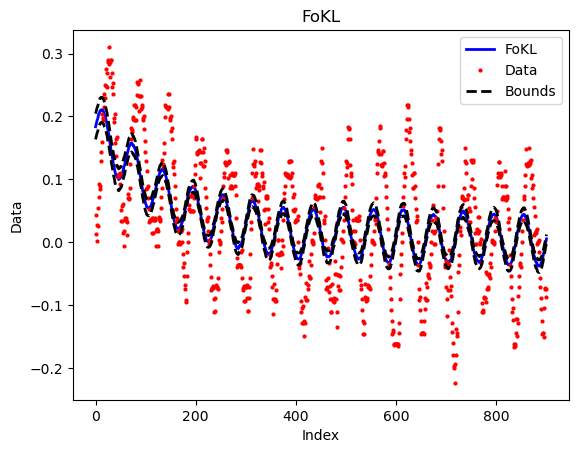

In [48]:
_ = GP_dTS1.coverage3(plot=True)